# Drawing the multipanel barplot for Q100: EUROPE AR6 land regions

In [1]:
ensembles = c('CORDEX', 'CMIP5', 'CMIP6')
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

data = list()
for (ensemble in ensembles){
    data[[ensemble]] = list()
    for (GWL in GWLs){
        data[[ensemble]][[GWL]] = list()
    }
    for (scenario in scenarios){
        data[[ensemble]][[scenario]] = list()
    }

}

In [ ]:
CWD = getwd()

## 1. Get the data from the json files

In [2]:
library(rjson)

Warning message:
“package ‘rjson’ was built under R version 3.6.3”


### Prepare R list with all the regions => Get the regions list from the CMIP6 json file, for GWL 1.5K

In [3]:
# -- List of regions for AFRICA
continent_regions = c('NEU','WCE','MED')

regions_by_continent = list(
    EUR_MaskDesert = c('NEU','WCE','MED')
    #CAM = c('NCA')
    )


all_regions = list()
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

for (region_name in continent_regions){
    all_regions[[region_name]] = list()
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        all_regions[[region_name]][[ensemble]] = list()
        for (GWL in GWLs){
            all_regions[[region_name]][[ensemble]][[GWL]] = list()
        }#end for GWL
        for (scenario in scenarios){
            all_regions[[region_name]][[ensemble]][[scenario]] = list()
        }#end for scenario
    }#end for ensemble
}#end for region_name


### Function to read in the data in the txt files provided by ICTP (Fabio Di Sante)

In [4]:
"metrics_reader"=function(metrics_filename){
    
    # -- Read the metrics file provided by Fabio
    lines=readLines(file(metrics_filename,open="r"))
    dat = c()
    for (elt in lines){
        tmp = gsub(' ','', elt)
        dat = c(dat, tmp)
    }#end for elt
    # -- Each region has 4 lines => the number of regions is the length / 4
    nregions = length(dat)/4
    # -- Store the results in res
    res = list()
    for (i in 1:nregions){
        # -- Calculate the index of the region name
        startind = (i-1)*4 + 1
        resname = dat[startind]
        print(resname)
        p10 = as.numeric(dat[startind+1])
        median = as.numeric(dat[startind+2])
        p90 = as.numeric(dat[startind+3])
        print(c(p10,median,p90))
        res[[resname]] = c(p10, median, p90)
    }
    return(res)
}

### Read in CMIP6 data

In [5]:
ensemble = 'CMIP6'

for (continent in names(regions_by_continent)){
    print(paste(continent,'==> '))
    print(regions_by_continent[[continent]])
    
    # -- Recent past raw value
    clim_period = 'modern_raw'
    wclim_period='ssp585_1995-2014'
    if (continent=='EUR_MaskDesert'){
        wcontinent='EUR'
    }else{
        wcontinent=continent
    }
    metrics_filename = paste(CWD,'/../../data/Figure_12.9/Q100_',ensemble,'/Q100_',wclim_period,'.nc_',wcontinent,'.txt',sep='')
    print(paste('Raw values :', metrics_filename))
    res_metrics_by_AR6region = metrics_reader(metrics_filename)
    for (region_name in names(res_metrics_by_AR6region)){
        all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
    }
     
    # -- Differences for future time periods and GWLs
    for (clim_period in c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late','1.5','2','4')){
        if (clim_period=='2.6_mid'){ wclim_period='ssp126_mid' }
        if (clim_period=='2.6_late'){ wclim_period='ssp126_far' }
        if (clim_period=='8.5_mid'){ wclim_period='ssp585_mid' }
        if (clim_period=='8.5_late'){ wclim_period='ssp585_far' }
        if (clim_period=='1.5'){ wclim_period='1.5' }
        if (clim_period=='2'){ wclim_period='2.0' }
        if (clim_period=='4'){ wclim_period='4.0' }
        
        metrics_filename = paste(CWD,'/../../data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_',ensemble,'/',wclim_period,'_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period
    
    
}#end for continent

[1] "EUR_MaskDesert ==> "
[1] "NEU" "WCE" "MED"
[1] "Raw values : /home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP6/Q100_ssp585_1995-2014.nc_EUR.txt"
[1] "NEU"
[1] 0.115787 0.180325 0.333189
[1] "WCE"
[1] 0.0735834 0.1385620 0.1929840
[1] "MED"
[1] 0.0560621 0.1216510 0.1763990
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP6/ssp126_mid_EUR_MaskDesert.txt"
[1] "NEU"
[1] -0.04941590 -0.00834623  0.00917659
[1] "WCE"
[1] -0.03574740 -0.00923996  0.00928529
[1] "MED"
[1] -0.02222420  0.00135062  0.02094770
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP6/ssp585_mid_EUR_MaskDesert.txt"
[1] "NEU"
[1] -0.06154170 -0.01805650  0.00395673
[1] "WCE"
[1] -0.04197210 -0.00869462  0.00604605
[1] "MED"
[1] -0.043949400  0.000794427  0.020549800
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP6/ssp126_far_EUR_MaskDesert.txt"
[1] "NEU"
[1] -0.05964620 -0.00573089  0.0

### Read in CMIP5 data

In [6]:
ensemble = 'CMIP5'

for (continent in names(regions_by_continent)){
    print(paste(continent,'==> '))
    print(regions_by_continent[[continent]])
    
    # -- Recent past raw value
    clim_period = 'modern_raw'
    wclim_period='rcp85_1995-2014'
    if (continent=='EUR_MaskDesert'){
        wcontinent='EUR'
    }else{
        wcontinent=continent
    }
    metrics_filename = paste(CWD,'/../../data/Figure_12.9/Q100_',ensemble,'/Q100_',wclim_period,'.nc_',wcontinent,'.txt',sep='')
    print(paste('Raw values :', metrics_filename))
    res_metrics_by_AR6region = metrics_reader(metrics_filename)
    for (region_name in names(res_metrics_by_AR6region)){
        all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
    }
     
    # -- Differences for future time periods and GWLs
    for (clim_period in c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late','1.5','2','4')){
        if (clim_period=='2.6_mid'){ wclim_period='rcp26_mid' }
        if (clim_period=='2.6_late'){ wclim_period='rcp26_far' }
        if (clim_period=='8.5_mid'){ wclim_period='rcp85_mid' }
        if (clim_period=='8.5_late'){ wclim_period='rcp85_far' }
        if (clim_period=='1.5'){ wclim_period='1.5' }
        if (clim_period=='2'){ wclim_period='2.0' }
        if (clim_period=='4'){ wclim_period='4.0' }
        
        metrics_filename = paste(CWD,'/../../data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_',ensemble,'/',wclim_period,'_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period
    
    
}#end for continent

[1] "EUR_MaskDesert ==> "
[1] "NEU" "WCE" "MED"
[1] "Raw values : /home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CMIP5/Q100_rcp85_1995-2014.nc_EUR.txt"
[1] "NEU"
[1] 0.170146 0.314748 0.446963
[1] "WCE"
[1] 0.0999868 0.2358900 0.3698180
[1] "MED"
[1] 0.0609886 0.1026070 0.1844840
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP5/rcp26_mid_EUR_MaskDesert.txt"
[1] "NEU"
[1] -0.03889740 -0.00595520  0.00442807
[1] "WCE"
[1] -0.02632900 -0.00762853  0.02280520
[1] "MED"
[1] -0.00858707  0.00456300  0.01559470
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP5/rcp85_mid_EUR_MaskDesert.txt"
[1] "NEU"
[1] -0.0544962 -0.0168778  0.0152681
[1] "WCE"
[1] -0.03282600 -0.00894959  0.01151760
[1] "MED"
[1] -0.01865450 -0.00105392  0.01506330
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CMIP5/rcp26_far_EUR_MaskDesert.txt"
[1] "NEU"
[1] -0.0374820 -0.0074062  0.0195738
[1] "

### Read in CORDEX data

In [7]:
ensemble = 'CORDEX'
wensemble = paste(ensemble,'-core',sep='')

for (continent in names(regions_by_continent)){
    print(paste(continent,'==> '))
    print(regions_by_continent[[continent]])
    
    # -- Recent past raw value
    clim_period = 'modern_raw'
    wclim_period='rcp85_1995-2014'
    if (continent=='EUR_MaskDesert'){
        wcontinent='EUR'
    }else{
        wcontinent=continent
    }
    metrics_filename = paste(CWD,'/../../data/Figure_12.9/Q100_',wensemble,'/Q100_',wclim_period,'.nc_',wcontinent,'.txt',sep='')
    print(paste('Raw values :', metrics_filename))
    res_metrics_by_AR6region = metrics_reader(metrics_filename)
    for (region_name in names(res_metrics_by_AR6region)){
        all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
    }
     
    # -- Differences for future time periods and GWLs
    for (clim_period in c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late','1.5','2','4')){
        if (clim_period=='2.6_mid'){ wclim_period='rcp26_mid' }
        if (clim_period=='2.6_late'){ wclim_period='rcp26_far' }
        if (clim_period=='8.5_mid'){ wclim_period='rcp85_mid' }
        if (clim_period=='8.5_late'){ wclim_period='rcp85_far' }
        if (clim_period=='1.5'){ wclim_period='1.5' }
        if (clim_period=='2'){ wclim_period='2.0' }
        if (clim_period=='4'){ wclim_period='4.0' }
        
        metrics_filename = paste(CWD,'/../../data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_',wensemble,'/',wclim_period,'_',continent,'.txt',sep='')
        print(metrics_filename)
        res_metrics_by_AR6region = metrics_reader(metrics_filename)
        for (region_name in names(res_metrics_by_AR6region)){
            all_regions[[region_name]][[ensemble]][[clim_period]][['vals']] = res_metrics_by_AR6region[[region_name]]
        }
    }#end for clim_period
    
    
}#end for continent

[1] "EUR_MaskDesert ==> "
[1] "NEU" "WCE" "MED"
[1] "Raw values : /home/jservon/Chapter12_IPCC/data/Figure_12.9/Q100_CORDEX-core/Q100_rcp85_1995-2014.nc_EUR.txt"
[1] "NEU"
[1] 0.226249 0.483445 0.557356
[1] "WCE"
[1] 0.184365 0.374428 0.455977
[1] "MED"
[1] 0.218720 0.394702 0.577615
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CORDEX-core/rcp26_mid_EUR_MaskDesert.txt"
[1] "NEU"
[1] -0.05378250 -0.00919899  0.01000290
[1] "WCE"
[1] -0.02105640  0.00301032  0.02291960
[1] "MED"
[1] -0.00860111  0.02181240  0.04423880
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CORDEX-core/rcp85_mid_EUR_MaskDesert.txt"
[1] "NEU"
[1] -0.0503788 -0.0176008  0.0159018
[1] "WCE"
[1] -0.0161779  0.0101177  0.0403105
[1] "MED"
[1] -0.02748610 -0.00197496  0.02348440
[1] "/home/jservon/Chapter12_IPCC/data/PERCENTILES_CHANGE_DIVDRA_ABSOLUTE/percentiles_CORDEX-core/rcp26_far_EUR_MaskDesert.txt"
[1] "NEU"
[1] -0.036578900 -0.0133144

## Attribute the colors

In [8]:
for (region_name in continent_regions){
    ensemble = 'CMIP6'
    all_regions[[region_name]][[ensemble]][['modern_raw']][['color']] = 'black'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid4'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'darkorange'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'tan4'

    ensemble = 'CMIP5'
    all_regions[[region_name]][[ensemble]][['modern_raw']][['color']] = 'grey40'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid3'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'sandybrown'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff4'

    ensemble = 'CORDEX'
    all_regions[[region_name]][[ensemble]][['modern_raw']][['color']] = 'grey60'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'mediumpurple1'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'navajowhite2'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff3'
}#end for region_name

### Function to draw the barplot

In [9]:
"vert_scale"=function(val, ylim){
    return( (val - ylim[1]) / (ylim[2] - ylim[1]) )
}

"barplot_satellite_chap12"=function(data, title, ylabel, do_xlab='TRUE',
                                    do_ylab_raw='TRUE', do_ylab_diff='TRUE', mar=c(4,3,2.5,1)){
    #
    # -- Names
    ensembles = c('CORDEX','CMIP5', 'CMIP6')
    GWLs = c('1.5','2','4')
    scenarios = c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late')
    nhorizons = length(GWLs)+length(scenarios)
    
    ylim_base = c(0,1)
    ylim_raw = c(0,0.8)
    ylim_diff = c(-0.15,0.1)
        
    ylim = ylim_base
    
    # -- position on the x axis of the ensembles
    # RP, GWL 1.5, 2, 4, mid, long
    xpos = c(1, 2,3,4, 5,6, 7,8)
    xvert = c(1.5, 2.5,3.5,4.5, 6.5)
    inner_margin = 0.5
    xlim = c(1-inner_margin, max(xpos)+inner_margin)
    general_cex=1.3
    par(cex=general_cex)
    par(mar=mar)
    plot(1:nhorizons, rep(NA, nhorizons), col='white', ylim=ylim, xlim=xlim,
         xaxt='n', yaxt='n', xlab='', ylab='', xaxs="i", yaxs='i', font=2)
    mtext(ylabel, 2, font=2, line=2.2, cex=general_cex)
    #     cex.axis=1.2, cex.lab=1.5, font=2)
    par(xpd=NA)
    par(font=2)
    
    # -- Add horizontal lines for raw values
    #for (yval in vert_scale(seq(0,1.4,by=0.2), ylim_raw)){
    #    lines(c(xlim[1],xvert[1]),rep(yval,2),type='l', lty=2)
    #}
    
    # -- Add horizontal lines for diff
    for (yval in vert_scale(c(-0.1,0,0.1), ylim_diff)){
        lines(c(xvert[1],xlim[2]),rep(yval,2),type='l', lty=2)
    }
    
    delta = 0.24 # - space between CMIP6/CMIP5/CORDEX
    
    # -- Plot data
    # -- Plot baseline
    i = 1
    for (horizon in c('modern_raw',GWLs, scenarios)){
        j = xpos[i] - delta
        for (ensemble in ensembles){
            print(paste(horizon, ensemble))
            if (horizon=='modern_raw'){
                dat = vert_scale(data[[ensemble]][[horizon]][['vals']], ylim_raw)
            }else{
                dat = vert_scale(data[[ensemble]][[horizon]][['vals']], ylim_diff)
            }
            print(dat)
            if (is.null(dat)){dat = c(NA,NA,NA)}
            col = data[[ensemble]][[horizon]][['color']]
            lines(rep(j,2), c(dat[1],dat[3]), type='l', col=col, lwd=4)
            points(j, dat[2], cex=1.5, pch=16, col=col)
            j = j + delta
        }
        i = i + 1
    }

    
    # -- Y axis raw
    yvals = seq(0,0.8,by=0.2)
    dumyvals = vert_scale(yvals, ylim_raw)
    ylabels = yvals
    par(cex=2.4)
    axis(2, at=dumyvals, labels=rep('',length(yvals)))
    if (do_ylab_raw=='TRUE'){
        axis(2, pos=0.75, at=dumyvals, tick='FALSE', labels=ylabels, las=1)
    }
    par(cex=general_cex)
    
    # -- Y axis Differences
    yvals = c(-0.1,0,0.1)
    dumyvals = vert_scale(yvals, ylim_diff)
    ylabels = yvals
    par(cex=2.2)
    axis(4, at=dumyvals, labels=rep('',length(yvals)))
    if (do_ylab_diff=='TRUE'){
        axis(4, pos=xlim[2]-0.25, at=dumyvals, labels=ylabels, las=1, tick='FALSE')
    }
    par(cex=general_cex)
    

    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)

    bline = ylim[1] - 0.22*(ylim[2]-ylim[1])
    #
    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }

    # -- Vertical lines
    vline = ylim
    vline[1] = ylim[1] - (ylim[2]-ylim[1])*0.16
    if (do_xlab=='TRUE'){
        for (v in xvert){lines(c(v,v),vline,type='l', lwd=1)}
    }else{
        for (v in xvert){lines(c(v,v),ylim,type='l')}
    }
    # Make a thicker line to separate r.past from the rest
    vline = ylim
    v = xvert[1]
    lines(c(v,v),vline,type='l', lwd=3)
    
    if (do_xlab=='TRUE'){
        cex_text = 1.8
        bline = ylim[1] - 0.2*(ylim[2]-ylim[1])
        #
        # -- Labels GWLs
        GWLs_range = c(1.5,4.35)
        btext = ylim[1] - 0.3*(ylim[2]-ylim[1])
        lines(GWLs_range, c(bline,bline), type='l', lwd=3)
        text(mean(GWLs_range),btext,expression("GWL"), font=1, cex=cex_text*0.9)

        btext2 = ylim[1] - 0.10*(ylim[2]-ylim[1])
        text(1,btext2-0.12,"r.past.", cex=cex_text, font=1, srt=90, adj=c(0.5,0.5))
        text(2,btext2,"1.5", cex=cex_text, font=1, adj=c(0.5,0.5))#, srt=90
        text(3,btext2,"2", cex=cex_text, font=1, adj=c(0.5,0.5))#, srt=90
        text(4,btext2,"4", cex=cex_text, font=1, adj=c(0.5,0.5))#, srt=90

        # -- Labels time slices = modern, mid-term, long-term
        xmodern = 4.5
        xmid = 5.5
        xlate = 7.5
        text(xmid,btext2, "mid.", font=1, cex=cex_text, adj=c(0.5,0.5))#, srt=90
        text(xlate,btext2, "long.", font=1, cex=cex_text, adj=c(0.5,0.5))#, srt=90

        time_slices = c(4.65,8.5)
        lines(time_slices, c(bline,bline), type='l', lwd=3)
        text(mean(time_slices),btext,"Time slices", font=1, cex=cex_text)
    }#end if do_ylab
    
    
}


In [10]:
region = 'EUROPE'


figname = paste(CWD,'/../../figs/Figure_12.9/panel_c_',region,'_Q100_boxplot.png',sep='')
png(figname, width=900,height=650)
mat=rbind(
        c(1,0),
        c(2,3)
    )


layout(mat, heights=c(1,1.35), widths=c(1,1))
i = 1
for (subregion in continent_regions){
    mar = c(1,1,2.5,1)
    if (subregion %in% c('NEU','WCE')){
        do_ylab_raw='TRUE'
        mar[2]=4
    }else{
        do_ylab_raw='FALSE'
    }#
    if (subregion %in% c('MED')){
        do_ylab_diff='TRUE'
        mar[4]=4
    }else{
        do_ylab_diff='FALSE'
    }#
    if (subregion %in% c('NEU')){ do_ylab_diff='TRUE' }
    if (subregion %in% c('WCE','MED')){
        do_xlab='TRUE'
        mar[1] = 5.5 # -- bottom margin
    }else{
        do_xlab='FALSE'
    }#
    plot_title = subregion
    ylab = ''
    barplot_satellite_chap12(all_regions[[subregion]],plot_title, ylab, mar=mar, do_xlab=do_xlab,
                             do_ylab_raw=do_ylab_raw, do_ylab_diff=do_ylab_diff)
    
    i = i + 1
}

dev.off()

[1] "modern_raw CORDEX"
[1] 0.2828113 0.6043062 0.6966950
[1] "modern_raw CMIP5"
[1] 0.2126825 0.3934350 0.5587037
[1] "modern_raw CMIP6"
[1] 0.1447337 0.2254063 0.4164863
[1] "1.5 CORDEX"
[1] 0.4327544 0.5654883 0.6558508
[1] "1.5 CMIP5"
[1] 0.4587364 0.5988546 0.6557216
[1] "1.5 CMIP6"
[1] 0.4451856 0.5857864 0.6520308
[1] "2 CORDEX"
[1] 0.4480868 0.5352680 0.6632272
[1] "2 CMIP5"
[1] 0.4223628 0.5698659 0.6610800
[1] "2 CMIP6"
[1] 0.3933708 0.5647356 0.6327620
[1] "4 CORDEX"
[1] 0.2800656 0.5036972 0.7370708
[1] "4 CMIP5"
[1] 0.2241808 0.4265640 0.5572340
[1] "4 CMIP6"
[1] 0.2003092 0.3923380 0.5905353
[1] "2.6_mid CORDEX"
[1] 0.3848700 0.5632040 0.6400116
[1] "2.6_mid CMIP5"
[1] 0.4444104 0.5761792 0.6177123
[1] "2.6_mid CMIP6"
[1] 0.4023364 0.5666151 0.6367064
[1] "8.5_mid CORDEX"
[1] 0.3984848 0.5295968 0.6636072
[1] "8.5_mid CMIP5"
[1] 0.3820152 0.5324888 0.6610724
[1] "8.5_mid CMIP6"
[1] 0.3538332 0.5277740 0.6158269
[1] "2.6_late CORDEX"
[1] 0.4536844 0.5467424 0.6032970
[1] "

png 
  2

Warning message:
“package ‘IRdisplay’ was built under R version 3.6.3”


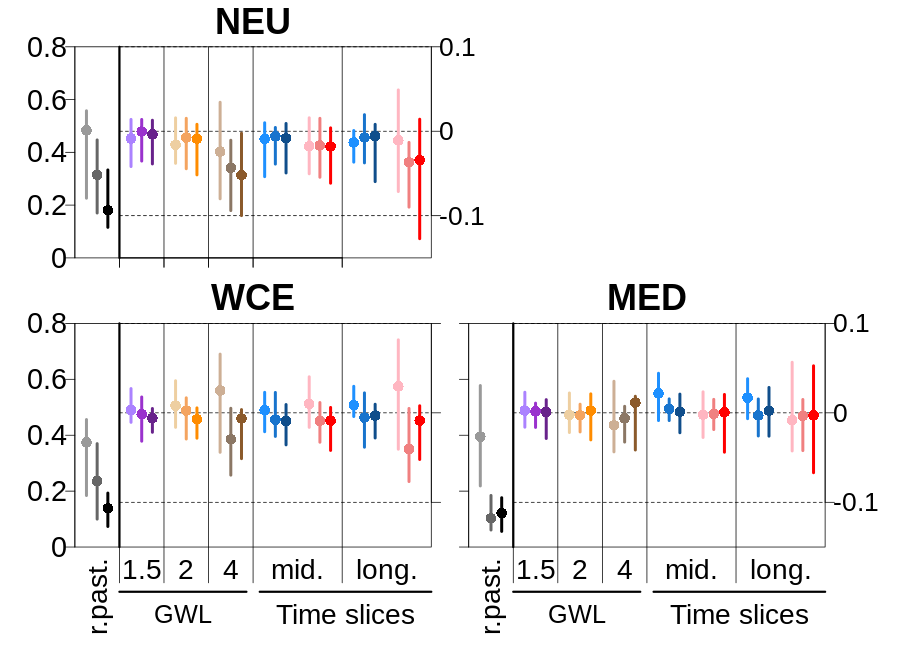

In [11]:
library("IRdisplay")
display_png(file=figname) 

## PDF

In [12]:
figname = paste(CWD,'/../../figs/Figure_12.9/panel_c_',region,'_Q100_boxplot.pdf',sep='')
pdf(figname, width=9*1.4,height=6.5*1.4)
mat=rbind(
        c(1,0),
        c(2,3)
    )


layout(mat, heights=c(1,1.35), widths=c(1,1))
i = 1
for (subregion in continent_regions){
    mar = c(1,1,2.5,1)
    if (subregion %in% c('NEU','WCE')){
        do_ylab_raw='TRUE'
        mar[2]=4
    }else{
        do_ylab_raw='FALSE'
    }#
    if (subregion %in% c('MED')){
        do_ylab_diff='TRUE'
        mar[4]=4
    }else{
        do_ylab_diff='FALSE'
    }#
    if (subregion %in% c('NEU')){ do_ylab_diff='TRUE' }
    if (subregion %in% c('WCE','MED')){
        do_xlab='TRUE'
        mar[1] = 5.5 # -- bottom margin
    }else{
        do_xlab='FALSE'
    }#
    plot_title = subregion
    ylab = ''
    barplot_satellite_chap12(all_regions[[subregion]],plot_title, ylab, mar=mar, do_xlab=do_xlab,
                             do_ylab_raw=do_ylab_raw, do_ylab_diff=do_ylab_diff)
    
    i = i + 1
}

dev.off()

[1] "modern_raw CORDEX"
[1] 0.2828113 0.6043062 0.6966950
[1] "modern_raw CMIP5"
[1] 0.2126825 0.3934350 0.5587037
[1] "modern_raw CMIP6"
[1] 0.1447337 0.2254063 0.4164863
[1] "1.5 CORDEX"
[1] 0.4327544 0.5654883 0.6558508
[1] "1.5 CMIP5"
[1] 0.4587364 0.5988546 0.6557216
[1] "1.5 CMIP6"
[1] 0.4451856 0.5857864 0.6520308
[1] "2 CORDEX"
[1] 0.4480868 0.5352680 0.6632272
[1] "2 CMIP5"
[1] 0.4223628 0.5698659 0.6610800
[1] "2 CMIP6"
[1] 0.3933708 0.5647356 0.6327620
[1] "4 CORDEX"
[1] 0.2800656 0.5036972 0.7370708
[1] "4 CMIP5"
[1] 0.2241808 0.4265640 0.5572340
[1] "4 CMIP6"
[1] 0.2003092 0.3923380 0.5905353
[1] "2.6_mid CORDEX"
[1] 0.3848700 0.5632040 0.6400116
[1] "2.6_mid CMIP5"
[1] 0.4444104 0.5761792 0.6177123
[1] "2.6_mid CMIP6"
[1] 0.4023364 0.5666151 0.6367064
[1] "8.5_mid CORDEX"
[1] 0.3984848 0.5295968 0.6636072
[1] "8.5_mid CMIP5"
[1] 0.3820152 0.5324888 0.6610724
[1] "8.5_mid CMIP6"
[1] 0.3538332 0.5277740 0.6158269
[1] "2.6_late CORDEX"
[1] 0.4536844 0.5467424 0.6032970
[1] "

png 
  2